In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
df.drop(['City'], axis=1, inplace=True)

In [14]:
df['Ad Topic Line'].head(20)

0                Cloned 5thgeneration orchestration
1                Monitored national standardization
2                  Organic bottom-line service-desk
3             Triple-buffered reciprocal time-frame
4                     Robust logistical utilization
5                   Sharable client-driven software
6                        Enhanced dedicated support
7                          Reactive local challenge
8                    Configurable coherent function
9                Mandatory homogeneous architecture
10                   Centralized neutral neural-net
11    Team-oriented grid-enabled Local Area Network
12            Centralized content-based focus group
13                 Synergistic fresh-thinking array
14                    Grass-roots coherent extranet
15               Persistent demand-driven interface
16               Customizable multi-tasking website
17                       Intuitive dynamic attitude
18     Grass-roots solution-oriented conglomeration
19          

In [15]:
df.drop(['Ad Topic Line','Timestamp'],axis=1,inplace=True)

In [17]:
df.drop(['Country'],axis=1,inplace=True)

In [18]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


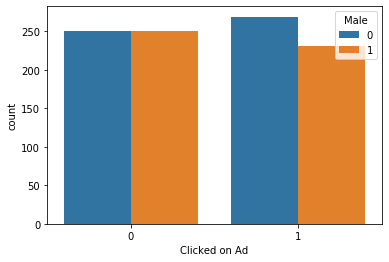

In [20]:
sns.countplot(x='Clicked on Ad',data=df,hue='Male')

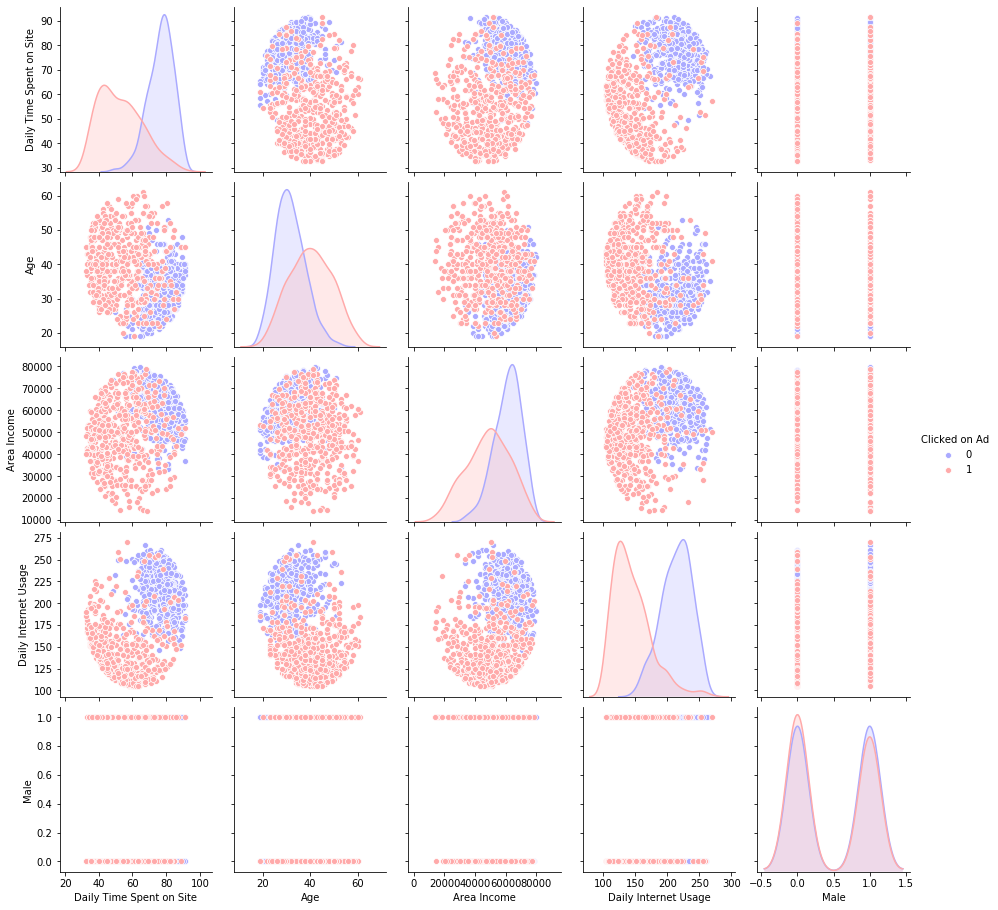

In [26]:
sns.pairplot(df,'Clicked on Ad',palette='bwr')

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad'],
      dtype='object')

In [54]:
X = df.drop(['Clicked on Ad'],axis=1)
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()

In [57]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
pred = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

